# Tutorial sulle API di Twitch


**Nome**: *Alessandro*

**Cognome**: *Privitera*

**Matricola**: *1000014972*

**Corso**: Social Media Management

**Docente**: Antonino Furnari

**Anno Accademico**: *2022-2023*


<p align="center" ><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Twitch_logo_2019.svg/2560px-Twitch_logo_2019.svg.png" style="width: 300px"></p>

---

## Indice

1. **[Introduzione sul social](#introduzione-sul-social)**
2. **[Introduzione all'uso delle APIs](#introduzione-alluso-delle-apis)**
    1. **[Creazione di un Account Twitch](#creazione-di-un-account-twitch)**
    2. **[Registrazione di un app](#registrazione-di-un-app)**
3. **[Ottenere un OAuth Token](#ottenere-un-oauth-token)**
4. **[Esempi di utilizzo delle APIs](#esempi-di-utilizzo-delle-apis)**
    1. **[Top 10 Categorie](#estrarre-una-top-10-delle-categorie)**
    2. **[Estrarre informazioni su uno streamer](#estrarre-informazioni-su-uno-specifico-canale-o-utente)**
    3. **[Estrarre informazioni sulle Stream attuali](#ottenere-informazioni-sulle-stream-attuali)**
5. **[Analisi Dati](#analisi-dati)**
    1. **[Categorie più streammate per fascia oraria](#categorie-più-streammate-per-fascia-oraria)**
    2. **[Categorie più streammate in assoluto](#categorie-più-streammate-in-assoluto-nella-giornata)**
    3. **[Numero totale di spetattori per fascia oraria](#numero-totale-di-spettatori-durante-le-fascie-orarie)**
    4. **[Distribuzione degli spettatori tra le varie stream](#distribuzione-degli-spettatori-tra-le-varie-stream-nelle-fascie-orarie)**
6. **[Wrapper API](#wrapper-python-delle-api-di-twitch)**
7. **[Conclusioni](#conclusioni)**

---

## Introduzione sul Social

Twitch è una piattaforma di live streaming di proprietà di Amazon. All'interno della piattaforma si possono guardare dirette di svariate tipologie o categorie; il punto forte della piattaforma è senza ombra di dubbio il gaming ma di recente stanno sempre più venendo fuori streaming riguardanti attualità e politica. <br> <br>

Chiunque abbia un account su twitch può decidere in qualsiasi momento di avviare una streaming anche se, ufficiosamente, gli account Twitch si dividono in Streamer e Spettatori.
Gli streamer, ovvero quegli utenti (o canali) che vanno in diretta regolarmente, successivamente al raggiungimento di determinati traguardi possono ottenere un contratto di Partnership con Twitch e monetizzare di fatto dalla piattaforma. <br> <br>

La più importante fonte di monetizzazione sono le cosiddette Sub o abbonamenti; abbonarsi ad un canale permette di non vedere pubblicità durante la riproduzione della diretta e di partecipare ad altre attività decise dallo streamer. <br> 
Le sub rappresentano il punto forte di Twitch poichè collegando il proprio account Amazon Prime è possibile abbonarsi ad uno streamer al mese in modo del tutto gratuito, andando comunque a supportarlo, poichè quest'ultimo riceverà comunque un compenso da Twitch.

<p>
    <a href="https://dev.twitch.tv/docs/api/" target="_blank">Documentazione Twitch APIs</a><br>
    Ciò che serve per utilizzare le API di Twitch è un semplice account Twitch e un token OAuth fornito dalla piattaforma.
</p>

---

## Introduzione all'uso delle APIs

### Creazione di un account Twitch

Per utilizzare le API è innanzitutto necessario possedere un account Twitch.<br>
Per registrarsi è sufficiente recarsi nell' <a target="blank_" href="https://www.twitch.tv/?lang=it">Homepage di Twitch</a> e cliccare, in alto a destra, su "Iscriviti": <br>
<p align="center"><img src="Img/RegistrazioneTwitch.png" style="width: 70%"></p>

Una volta creato l'account è necessario cliccare sul link all'interno della mail che avremo ricevuto per verificarlo.<br>
Inoltre, è necessario abilitare l'autenticazione a due fattori (2FA) altrimenti non potremo procedere con le fasi successive. <br>

### Registrazione di un App

Il primo step per ottenere un token di accesso alle API è registrare l'applicazione che abbiamo intenzione di creare. <br>
Per fare ciò bisogna:
- Accedere alla "Developer Console" del proprio account tramite il seguente link:<br>
<a target="blank_" href="https://dev.twitch.tv/console">https://dev.twitch.tv/console</a> <br>
- Cliccare sulla tab "Applicazioni"
- Cliccare su "Registra l'applicazione
<p align="center"><img src="Img/RegistraApplicazione.png" style="width: 70%"></p>

Fatto ciò comparirà una schermata dove dovremo:
- Inserire un nome per la nostra applicazione
- Inserire un URL di reindirizzamento OAuth sula quale verranno mandati i risultati delle autorizzazioni di accesso o eventuali messaggi di errorre. Per semplicità inseriamo "http://localhost:3000".
- Scegliere una categoria per la nostra applicazione
- Svolgere il CAPTCHA
- Cliccare su "Crea"
<p align="center"><img src="Img/ApplicationDetails.png" style="width: 70%"></p>

Fatto ciò verremo reindirizzati alla pagina precedente, ed in corrispondenza dell'applicazione appena registrata clicchiamo "Gestisci":
<p align="center"><img src="Img/CliccaGestisci.png" style="width: 70%"></p>

Dalla schermata che si apre conserviamo il client ID, ovvero l'ID della nostra applicazione e clicchiamo su "Nuovo Segreto" che genererà una secret key (client ID e Secret Key sono oscurati per motivi di privacy):
<p align="center"><img src="Img/SecretKey.png" style="width: 70%"></p>

---

## Ottenere un OAuth token

Per poter ottenere un token di autorizzazione saranno necessari:
- Client ID
- Secret Key

Andiamo quindi a mettere le mani sul codice e impostiamo due variabili globali:

In [1]:
#Twitch Client ID
ID:str = "vrtyon3beptdt4bem3ygog23yl342j"

#Twitch Secret Key
SECRET:str = "54jcl6pz0n5mi18lrfqkehgw6t1tj3"

Per ottenere il token dovremo inviare una richiesta POST all'endpoint <a target="blank_" href="https://id.twitch.tv/oauth2/token">https://id.twitch.tv/oauth2/token</a> fornendo Client ID, Secret Key e un parametro "grant_type" che va settato a "client_credentials". <br><br>
Importiamo quindi una libreria che ci consente di effettuare richieste POST e GET e inviamo la richiesta:

In [2]:
import requests
body = {
    'client_id': ID,
    'client_secret': SECRET,
    "grant_type": 'client_credentials'
}

r = requests.post('https://id.twitch.tv/oauth2/token', body)

Ci verrà restituito un oggetto JSON contenente l'access token. <br><br>
Importiamo una libreria che ci permetta di leggere il contenuto di tale oggetto:

In [3]:
import json
keys = r.json()
print(keys)

{'access_token': 'gukl6kf0sni1kwyb7pejsw1on2121k', 'expires_in': 5089123, 'token_type': 'bearer'}


Abbiamo quindi ottenuto il nostro access token.<br>
Passiamo quindi a vedere qualche esempio di utilizzo delle APIs.

---

## Esempi di utilizzo delle APIs

La lista completa degli endpoint disponibili è presente nelle reference delle APIs di Twitch al seguente link:<br>
<a target="blank_" href="https://dev.twitch.tv/docs/api/reference/">https://dev.twitch.tv/docs/api/reference/</a>
<br><br>
Generalemente per ottenere risposta dall'endpoint è sufficiente effettuare una richiesta GET che abbia nell'header il proprio Client ID e il proprio Access Token.<br>
Definiamo quindi una variabile "headers" contenente tali informazioni:

In [4]:
headers = {
    'Client-ID': ID,
    'Authorization': 'Bearer ' + keys['access_token']
}

Alcuni endpoint permettono di passare dei parametri aggiuntivi utili a filtrare i dati desiderati.

### Estrarre una top 10 delle categorie

Effettuaiamo la richiesta GET all'endpoint indicato nelle reference impostando il parametro "first" a 10. Come intuibile "first" definisce il numero massimo di oggetti da ritornare che di default è 20.

In [5]:
top10_categories = requests.get('https://api.twitch.tv/helix/games/top?first=10', headers=headers)

top10_categories_j = top10_categories.json()
print(top10_categories_j)

{'data': [{'id': '509658', 'name': 'Just Chatting', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/509658-{width}x{height}.jpg', 'igdb_id': ''}, {'id': '21779', 'name': 'League of Legends', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/21779-{width}x{height}.jpg', 'igdb_id': '115'}, {'id': '29595', 'name': 'Dota 2', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/29595-{width}x{height}.jpg', 'igdb_id': '2963'}, {'id': '516575', 'name': 'VALORANT', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/516575-{width}x{height}.jpg', 'igdb_id': '126459'}, {'id': '491931', 'name': 'Escape from Tarkov', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/491931_IGDB-{width}x{height}.jpg', 'igdb_id': '15536'}, {'id': '32982', 'name': 'Grand Theft Auto V', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/32982_IGDB-{width}x{height}.jpg', 'igdb_id': '1020'}, {'id': '512710', 'name': 'Call of Duty: Warzone', 'box_art_url': 'https://static-cdn.jtvnw.net/ttv

Per rendere la risposta più leggibile utilizziamo la librearia Pandas per creare un dataframe:

In [6]:
import pandas as pd
from IPython.display import display

df_top10_categories = pd.json_normalize(top10_categories_j['data'])
display(df_top10_categories)

,id,name,box_art_url,igdb_id
0,509658,Just Chatting,https://static-cdn.jtvnw.net/ttv-boxart/509658...,
1,21779,League of Legends,https://static-cdn.jtvnw.net/ttv-boxart/21779-...,115
2,29595,Dota 2,https://static-cdn.jtvnw.net/ttv-boxart/29595-...,2963
3,516575,VALORANT,https://static-cdn.jtvnw.net/ttv-boxart/516575...,126459
4,491931,Escape from Tarkov,https://static-cdn.jtvnw.net/ttv-boxart/491931...,15536
5,32982,Grand Theft Auto V,https://static-cdn.jtvnw.net/ttv-boxart/32982_...,1020
6,512710,Call of Duty: Warzone,https://static-cdn.jtvnw.net/ttv-boxart/512710...,131800
7,18122,World of Warcraft,https://static-cdn.jtvnw.net/ttv-boxart/18122-...,123
8,263490,Rust,https://static-cdn.jtvnw.net/ttv-boxart/263490...,3277
9,32399,Counter-Strike: Global Offensive,https://static-cdn.jtvnw.net/ttv-boxart/32399_...,1372


### Estrarre informazioni su uno specifico canale (o utente)
Per estrarre informazioni su di uno specifico canale è prima di tutto necessario trovare l'ID di tale canale.<br>
Per fare ciò usiamo l'endpoint descritto nelle reference: dovremo passare come unico parametro, chiamato "login", il nome del canale:

In [7]:
channel_name = "Enkk"

channel_info = requests.get('https://api.twitch.tv/helix/users?login='+ channel_name +'', headers=headers)

channel_info_j = channel_info.json()
df_channel_info = pd.json_normalize(channel_info_j['data'])
display(df_channel_info)

,id,login,display_name,type,broadcaster_type,description,profile_image_url,offline_image_url,view_count,created_at
0,52443328,enkk,Enkk,,partner,La spalla sanguisuesca di Twitch Italia.,https://static-cdn.jtvnw.net/jtv_user_pictures...,https://static-cdn.jtvnw.net/jtv_user_pictures...,5307199,2013-11-30T19:35:20Z


Come è possibile vedere ci vengono restituite informazioni quali:
- L'ID del canale (che cercavamo)
- Il login
- Il nome visualizzato
- Se è partener di Twitch o meno
- La descrizione del canale
- Un link all'immagine del profilo
- Un counter di viewer totali (dalla creazione del canale)
- La data di creazione del canale
<br><br>

Estraiamo a questo punto l'ID del canale dalla risposta che abbiamo ottenuto:

In [8]:
channel_id = channel_info_j['data'][0]['id']
print(channel_id)

52443328


Utilizzando adesso un altro endpoint, e fornendo l'ID del canale, possiamo ottenere una serie di altre informazioni:

In [9]:
channel_info2 = requests.get('https://api.twitch.tv/helix/channels?broadcaster_id='+ channel_id +'', headers=headers)

channel_info2_j = channel_info2.json()
df_channel_info2 = pd.json_normalize(channel_info2_j['data'])
display(df_channel_info2)

,broadcaster_id,broadcaster_login,broadcaster_name,broadcaster_language,game_id,game_name,title,delay,tags
0,52443328,enkk,Enkk,it,27471,Minecraft,PRESTREAM MINECRAFTIANA; MAX PROJETTI E HARD C...,0,"[cooking, funny, gigachad, phd, almostchiavabl..."


Notiamo che la risposta contiene in più rispetto alla risposta precedente:
- La lingua dello streamer
- La categoria della live in corso o dell'utlima live (nel caso non sia attualmente in diretta)
- L'ID della suddetta categoria
- Il titolo della diretta
- Il delay impostato nella diretta
- I tag della diretta

### Ottenere informazioni sulle stream attuali

Andiamo a vedere un ultimo esempio in cui useremo un endpoint molto interessante che ci permette di ottenere informazioni sulle stream in corso al momento della richiesta.<br>
Impostiamo come parametri la tipologia di stream (attualmente in live) e la lingua (italiano):

In [10]:
streams_info = requests.get('https://api.twitch.tv/helix/streams?type=live&language=it', headers=headers)
streams_info_j = streams_info.json()
df_streams_info = pd.json_normalize(streams_info_j['data'])
display(df_streams_info.head())

,id,user_id,user_login,user_name,game_id,game_name,type,title,viewer_count,started_at,language,thumbnail_url,tag_ids,tags,is_mature
0,40376282920,48192899,moonryde,Moonryde,512710,Call of Duty: Warzone,live,(1/5) NUKEGIORNO!!! | !Cuffie !Temperia !Armi ...,1951,2023-01-23T09:01:54Z,it,https://static-cdn.jtvnw.net/previews-ttv/live...,[5b9935eb-1e9a-4217-98ad-62bda5cff0d1],"[Italiano, DropAbilitati, WArzone, fps, italia]",False
1,40376457592,490865808,matteoagostinivgc,MatteoAgostiniVGC,13332,Pokémon FireRed/LeafGreen,live,PIL2 - Piangere x3 | !telegram !youtube !tikto...,1379,2023-01-23T10:05:43Z,it,https://static-cdn.jtvnw.net/previews-ttv/live...,[5b9935eb-1e9a-4217-98ad-62bda5cff0d1],[Italiano],False
2,40376103544,116434237,droodthund3r,DROODTHUND3R,13332,Pokémon FireRed/LeafGreen,live,PILLALO DOUS [!PIL2] !viva,1127,2023-01-23T07:42:09Z,it,https://static-cdn.jtvnw.net/previews-ttv/live...,[5b9935eb-1e9a-4217-98ad-62bda5cff0d1],"[Pokemon, Hearthstone, ladder, Kaizo, Italiano...",False
3,40376084696,160489367,xiuder_,Xiuder_,33214,Fortnite,live,SPIDER-MERD! !band !prime !merch,868,2023-01-23T07:31:08Z,it,https://static-cdn.jtvnw.net/previews-ttv/live...,[5b9935eb-1e9a-4217-98ad-62bda5cff0d1],"[xiuder, fortnite, BATTLEROYALE, xiuderone, dr...",False
4,40375988680,407819235,capitanbarbanera,CapitanBarbanera,1745202732,FIFA 23,live,🟥ORE 12:15 ICON WC/MID 88+ SUL MIO ACCOUNT🟥 M...,775,2023-01-23T06:26:07Z,it,https://static-cdn.jtvnw.net/previews-ttv/live...,[5b9935eb-1e9a-4217-98ad-62bda5cff0d1],None,False


Otteniamo le seguenti informazioni:
- ID della stream
- ID dell'utente (streamer)
- login dello streamer
- Nome visualizzato dello streamer
- Nome della categoria della stream
- Tipologia della stream (live o non live)
- Titolo della stream
- Counter degli spettatori attuali della stream
- Data di inizio della stream
- Lingua della stream
- URL per l'immagine della Thumbnail
- ID dei tag della stream
- Tag della stream
- Booleano che indica se la stream è +18 o meno

Questo endpoint verrà adesso utilizzato all'interno di questo tutorial per fare un analisi più dettagliata di questi dati.

---

## Analisi Dati

Lo script che segue utilizza l'API precedentemente descritta per estrarre dati sulle prime 50 stream italiane, ordinate per numero di spettatori, ogni ora.<br>
Lo script ha eseguito il primo "pool" giorno 22/01/2023 alle ~00.00 e ha terminato con il 24esimo e ultimo pool giorno 22/01/2023 alle ~23.00 .<br>
I dati estratti sono stati salvati sul file "*stream_data.json*".

In [ ]:
import json
import numpy
import requests
import datetime
import time
import pandas as pd
from IPython.display import display

#Twitch Client ID
ID:str = "<Your Client ID>"

#Twitch api Secret
SECRET:str = "<Your Secret Key>"

body = {
    'client_id': ID,
    'client_secret': SECRET,
    "grant_type": 'client_credentials'
}
headers = {
    'Client-ID': ID,
    'Authorization': 'Bearer ' + keys['access_token']
}
r = requests.post('https://id.twitch.tv/oauth2/token', body)
keys = r.json()

#First pool

new_streams = requests.get('https://api.twitch.tv/helix/streams?type=live&language=it&first=50', headers=headers)
new_streams_info = new_streams.json()

streamdata = {
    "root" : [{
        "date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),  
        "data": new_streams_info['data']}
    ]
}

with open("stream_data.json", "w") as outfile:
    json.dump(streamdata, outfile)

print("Executed first pool - ["+ datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") +"]")

#---------------------------------------------------------------
count = 0
while count < 23 :
    time.sleep(3600)
    
    new_streams = requests.get('https://api.twitch.tv/helix/streams?type=live&language=it&first=50', headers=headers)
    new_streams_info = new_streams.json()

    new_streamdata = {
        "date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "data": new_streams_info['data']
    }

    with open('stream_data.json', 'r+', encoding="utf8") as openfile:
        
        streams_info = json.load(openfile)
        streams_info['root'].append(new_streamdata)
        openfile.seek(0)
        json.dump(streams_info,openfile)
        
    print("Executed pool #"+ str(count) +"- ["+ datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") +"]")       
    count = count + 1

Il file JSON è così strutturato:
- "root": elemento radice utile a raggruppare i pool, ognuno dei quali è formato da:
    - "date": timestap dell'esecuzione del pool
    - "data": dati estratti (che hanno la struttura della response dell'API)

In [12]:
with open('stream_data.json', 'r') as openfile:
    stream_data = json.load(openfile)
    
df_stream_data = pd.json_normalize(stream_data['root'])
display(df_stream_data)

,date,data
0,2023-01-22 00:00:52,"[{'id': '40368882680', 'user_id': '75830338', ..."
1,2023-01-22 01:00:52,"[{'id': '40368882680', 'user_id': '75830338', ..."
2,2023-01-22 02:00:53,"[{'id': '40368882680', 'user_id': '75830338', ..."
3,2023-01-22 03:00:53,"[{'id': '40368882680', 'user_id': '75830338', ..."
4,2023-01-22 04:00:54,"[{'id': '40369166056', 'user_id': '528897216',..."
5,2023-01-22 05:00:54,"[{'id': '40369166056', 'user_id': '528897216',..."
6,2023-01-22 06:00:55,"[{'id': '40369166056', 'user_id': '528897216',..."
7,2023-01-22 07:00:55,"[{'id': '46531678700', 'user_id': '132289488',..."
8,2023-01-22 08:00:55,"[{'id': '46531678700', 'user_id': '132289488',..."
9,2023-01-22 09:00:56,"[{'id': '46531678700', 'user_id': '132289488',..."


### Categorie più streammate per fascia oraria

Per ogni pool andiamo a vedere quali sono le categorie più streammate, ovvero il numero di live streaming di ogni categoria:

Definiamo una funzione che crei il grafico a barre e lo salvi nella cartella:

In [13]:
import matplotlib.pyplot as plt

def create_chart(x, y, title, path, width = 20, height = 3, xlabel="", ylabel=""):
    plt.figure(figsize=(width, height))  # width:20, height:3
    ax = plt.subplot()
    ax.bar(x,y, color='purple')
    plt.xticks(fontsize=12, rotation = 30, ha = 'right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(path, bbox_inches="tight")

In [ ]:
import matplotlib.pyplot as plt

for date in stream_data['root'] : 
    categories = {}
    time_stamp = date['date']
    for stream in date['data']:
        cat = stream['game_name'] 
        if cat not in categories :
            categories[cat] = 1
        else :
            categories[cat] += 1
            
    sorted_cat_values = sorted(categories.values(), reverse=True)
    sorted_categories = {}

    for i in sorted_cat_values :
        for j in categories.keys():
            if categories[j] == i :
                sorted_categories[j] = categories[j]
            
    x = sorted_categories.keys()
    y = sorted_categories.values()

    create_chart(x=x, y=y, title=time_stamp, path=str("charts/most_streammed_categories/" + time_stamp.replace(" ", "_").replace(":", "-")) + ".png", xlabel="Categoria", ylabel="Numero di Stream")

Facciamo qualche considerazione su questi grafici:<br>
<p align="center"><img src="charts/most_streammed_categories/2023-01-22_21-01-02.png"></p>
Questo è il grafico relativo alle 21.00, ovvero una delle fasce orarie in cui vi è molta utenza sulla piattaforma. Notiamo come la categoria più streammata sia il Just Chatting; le live di tale categoria consistono semplicemente nel parlare con la chat oppure in dei veri e propri talk show. La seconda categoria più streammata è "Sports" che analogamente al Just Chatting consiste in talk show sul tema sportivo (spesso calcistico).<br>
Entrambe queste categorie, si intuisce, richiedono una certa attenzione da parte del pubblico che, essendo probabilmente appena entrato nella piattaforma è propenso a seguire live di questo tipo.<br>
Diversamente, vediamo subito come nelle ore notturne, in cui l'attenzione cala inevitabilmente, prendono piede altre categorie di stream:
<p align="center"><img src="charts/most_streammed_categories/2023-01-22_03-00-53.png"></p>
Notiamo che aumenta il numero di live di "Grand Theft Auto V" ed entra in gioco una particolare categoria: "I'm Only Sleeping".<br>
La maggior presenza della prima è dovuta al fatto che la community di GTA V e nello specifico GTA RP (Role Play) è sovente giocare negli orari notturni.<br>
Per quanto riguarda le live "I'm Only Sleeping", il nome della categoria parla da se; queste sono live in cui lo streamer dorme mentre è in live mentre la chat ha la possibilità, donando, di far partire dei suoni per disturbare il sonno dello streamer.<br>
In generale, durante le ore notturne, vengono effettuate streaming che richiedono una minor concentrazione da parte dell'utente e che, in un certo senso, lo accompagnano al sonno.

### Categorie più streammate in assoluto nella giornata
Vediamo adesso quali sono le categorie di cui sono state effettuate più dirette durante la giornata:

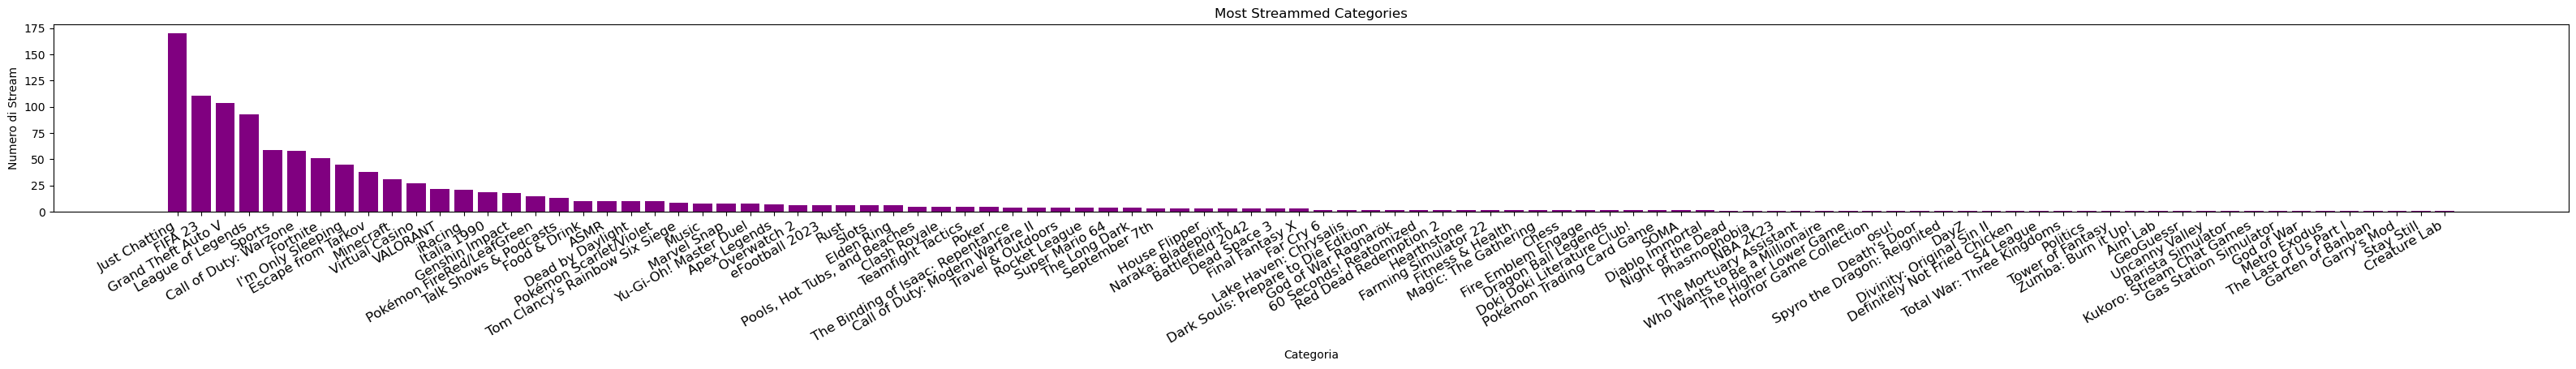

In [15]:
categories = {}
for date in stream_data['root'] : 
    time_stamp = date['date']
    for stream in date['data']:
        cat = stream['game_name'] 
        if cat not in categories :
            categories[cat] = 1
        else :
            categories[cat] += 1
            
    sorted_cat_values = sorted(categories.values(), reverse=True)
    sorted_categories = {}

    for i in sorted_cat_values :
        for j in categories.keys():
            if categories[j] == i :
                sorted_categories[j] = categories[j]
            
    x = sorted_categories.keys()
    y = sorted_categories.values()

create_chart(x=x, y=y, title="Most Streammed Categories", path=str("charts/most_streammed_categories/Most_Streammed_Categories.png"), width=40, xlabel="Categoria", ylabel="Numero di Stream")

Notiamo, come precedentemente detto che il "Just Chatting" è la categoria più streammata in assoluto durante la giornata, seguita da "FIFA 23" e "Grand Theft Auto V".

### Numero totale di spettatori durante le fascie orarie
Ci interessa adesso sapere quanta utenza sta sulla piattaforma durante le ore del giorno, ci aspettiamo che nelle ore notturne ci sia una diminuzione di spettatori totali.

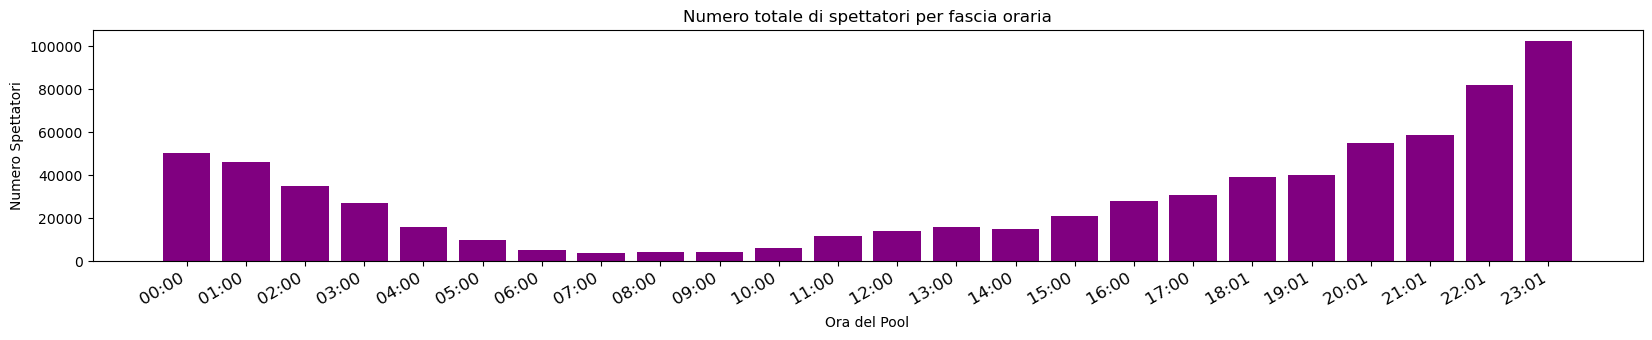

In [16]:
pool_viewers = {}
for pool in stream_data['root']:
    viewer_sum = 0
    for stream in pool['data']:
        viewer_sum += int(stream['viewer_count'])
    pool_viewers[pool['date'][10:16]] = viewer_sum

x = pool_viewers.keys()
y = pool_viewers.values()

create_chart(x=x, y=y, path="charts/viewers_by_pool.png", title="Numero totale di spettatori per fascia oraria", xlabel="Ora del Pool", ylabel="Numero Spettatori")

Quasi in accordo con quanto detto notiamo che dalle 03.00 in poi il numero di spettatori presenti su Twitch cala drasticamente. <br>
Notiamo inoltre che nelle ore mattutine la piattaforma non è molto trafficata; il maggior numero di utenti inizia ad arrivare dalle ore 17.00 in poi.<br>
C'è da considerare che i dati sono stati estratti di Domenica, giorno nel quale tendenzialmente le persone dormono più a lungo; per avere un analisi più affidabile si dovrebbero estrarre dati per un periodo di tempo molto più prolungato; ricordiamo però che quest'analisi ha solo uno scopo dimostrativo.

### Distribuzione degli spettatori tra le varie stream nelle fascie orarie

Andiamo adesso a vedere come si distribuiscono gli spetattori tra le varie stream in base alle fascie orarie.

In [ ]:
for pool in stream_data['root']:
    viewer_count = {}
    time_stamp = pool['date']
    for stream in pool['data']:
        viewer_count[stream['user_name']] = stream['viewer_count']
    
    x = viewer_count.keys()
    y = viewer_count.values()
    
    create_chart(x=x, y=y, title=time_stamp, path="charts/stream_viewers_by_hour/"+ time_stamp.replace(" ", "_").replace(":", "-") + ".png", width=30, xlabel="Streamer", ylabel="Numero Spettatori")

Prendiamo tre grafici di esempio per fare una breve analisi:
<p align="center"><img src="charts/stream_viewers_by_hour/2023-01-22_04-00-54.png"></p>
<p align="center"><img src="charts/stream_viewers_by_hour/2023-01-22_12-00-57.png"></p>
<p align="center"><img src="charts/stream_viewers_by_hour/2023-01-22_22-01-02.png"></p>
Possiamo notare che gli spettatori sono distribuiti in maniera tutt'altro che uniforme. <br>
Mi permetto di fare qualche congettura su questa informazione:<br>
Notiamo che in ogni fascia oraria ci sono 3/4 streamer con un numero di spettatori notevolmente superiore agli altri; questi sono ovviamente gli streamer più seguiti e rinomati della piattaforma. <br>
Ciò diventa ancora più evidente nel grafico delle 22.00 che vede protagonisti "Tumblurr" e "ZanoXVII", due degli streamer più affermati. <br>
Questa differenza fra streamer "grandi" e streamer "piccoli" è a mio avviso dovuta, o quanto meno amplificata, dal fatto che Twitch non ha la struttura di un motore di ricerca. <br>
Gli streamer presenti nella Home Page di Twitch sono per lo più streamer già affermati, e dunque un utente casuale entrerà con maggior probabilità in una delle dirette dei suddetti streamer.<br>
Inoltre, il sistema di ricerca di Twitch non permette di cercare efficacemente il contenuto che si desidera guardare, rendendo praticamente impossibile la scoperta di nuovi streamer. Gran parte degli utenti entra infatti su Twitch sapendo già qual è lo streamer che andrà a seguire, il quale, probabilmente, per ovvie ragioni, è già noto.

---

### Wrapper Python delle API di Twitch
Esistono svariati wrapper delle API di twitch per Python; ne vediamo brevemente uno di esempio: "*twitchAPI*":
L'intera documentazione del wrapper è presente al seguente link: <a target="blank_" href="https://pytwitchapi.readthedocs.io/en/stable/modules/twitchAPI.twitch.html#">https://pytwitchapi.readthedocs.io/en/stable/modules/twitchAPI.twitch.html#</a>

Inizializziamo un oggetto Twitch che ci servirà per usare le varie API. L'inizializzazione di tale oggetto richiede automaticamente un access token OAuth:

In [18]:
from twitchAPI.twitch import Twitch
from twitchAPI.helper import first
import asyncio

twitch = await Twitch(ID, SECRET)

Definiamo ora una funzione che ritorni informazioni su di uno specifico utente:

In [19]:
async def user_info(name):
    user = await first(twitch.get_users(logins=name))
    
    print(user.to_dict())

# run this example
await user_info('Enkk')

{'id': '52443328', 'login': 'enkk', 'display_name': 'Enkk', 'type': '', 'broadcaster_type': 'partner', 'description': 'La spalla sanguisuesca di Twitch Italia.', 'profile_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/85089564-6378-40b1-b70a-b88687cc1892-profile_image-300x300.png', 'offline_image_url': 'https://static-cdn.jtvnw.net/jtv_user_pictures/96633227-f7e5-48de-ad8e-da11c58de0d9-channel_offline_image-1920x1080.png', 'view_count': 5307199, 'created_at': '2013-11-30T19:35:20+00:00'}


Definiamo una funzione che ritorni la top 10 delle categorie:

In [20]:
async def top_categories(n):
    games = twitch.get_top_games()
    
    counter = 0
    async for game in games:
        print(game.to_dict())
        counter += 1
        if counter >= n: break

# run this example
await top_categories(10)

{'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/509658-{width}x{height}.jpg', 'id': '509658', 'name': 'Just Chatting', 'igdb_id': ''}
{'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/21779-{width}x{height}.jpg', 'id': '21779', 'name': 'League of Legends', 'igdb_id': '115'}
{'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/29595-{width}x{height}.jpg', 'id': '29595', 'name': 'Dota 2', 'igdb_id': '2963'}
{'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/516575-{width}x{height}.jpg', 'id': '516575', 'name': 'VALORANT', 'igdb_id': '126459'}
{'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/491931_IGDB-{width}x{height}.jpg', 'id': '491931', 'name': 'Escape from Tarkov', 'igdb_id': '15536'}
{'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/32982_IGDB-{width}x{height}.jpg', 'id': '32982', 'name': 'Grand Theft Auto V', 'igdb_id': '1020'}
{'box_art_url': 'https://static-cdn.jtvnw.net/ttv-boxart/512710-{width}x{height}.jpg', 'id': '512710', 'name': 'Ca

Definiamo ora un ultima funzione che ritorni le prime 10 streams italiane:

In [21]:
async def top_streams(n):
    streams = twitch.get_streams(language='it')
    
    counter = 0
    async for stream in streams:
        print(stream.to_dict())
        counter += 1
        if counter >= n: break

# run this example
await top_streams(10)

twitch.close()

{'id': '40376282920', 'user_id': '48192899', 'user_login': 'moonryde', 'user_name': 'Moonryde', 'game_id': '512710', 'game_name': 'Call of Duty: Warzone', 'type': 'live', 'title': '(1/5) NUKEGIORNO!!! | !Cuffie !Temperia !Armi !Bolt !SetAudio !HandCa', 'viewer_count': 2060, 'started_at': '2023-01-23T09:01:54+00:00', 'language': 'it', 'thumbnail_url': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_moonryde-{width}x{height}.jpg', 'tag_ids': ['5b9935eb-1e9a-4217-98ad-62bda5cff0d1'], 'is_mature': False, 'tags': ['Italiano', 'DropAbilitati', 'WArzone', 'fps', 'italia']}
{'id': '40376457592', 'user_id': '490865808', 'user_login': 'matteoagostinivgc', 'user_name': 'MatteoAgostiniVGC', 'game_id': '13332', 'game_name': 'Pokémon FireRed/LeafGreen', 'type': 'live', 'title': 'PIL2 - Piangere x3 | !telegram !youtube !tiktok !pil2', 'viewer_count': 1379, 'started_at': '2023-01-23T10:05:43+00:00', 'language': 'it', 'thumbnail_url': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_matteoagos

<coroutine object Twitch.close at 0x000002DA4F5158C0>

Abbiamo dunque constatato come sia possibile usare le stesse API descritte nella sezione precedente del tutorial attraverso un Wrapper di quest'ultime in Python.

---

## Conclusioni

Come abbiamo visto, usare le API di Twitch può, con qualche accorgimento, essere abbastanza semplice. Meno semplice è ottenere delle informazioni rilevanti in maniera già strutturata, spesso è necessario effettuare richieste a diversi endpoint per ottenere i dati nella struttura desiderata.<br>
Scrivendo questo tutorial mi sono reso conto di quanto possa essere complesso ottenere dei buoni dati, privi di bias e da cui si possano trarre delle analisi affidabili.

---